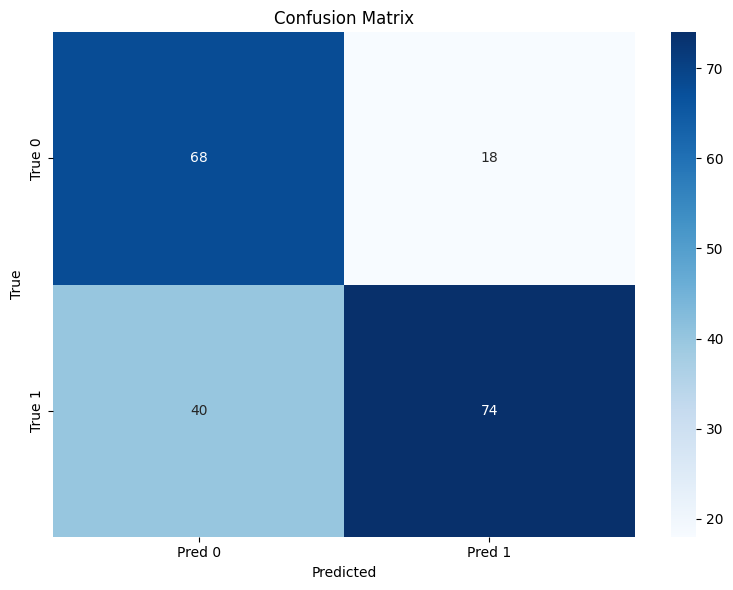

Logistic Regression Model Results
Accuracy: 0.710
Precision: 0.804
Recall: 0.649
F1 Score: 0.718

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           68           18
Actual 1           40           74

Classification Report:
      Class  Precision  Recall  F1 Score  Support
0  Class 0       0.63    0.79      0.70       86
1  Class 1       0.80    0.65      0.72      114


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your provided results
accuracy = 0.71
precision = 0.8043478260869565
recall = 0.6491228070175439
f1 = 0.7184466019417476

# Confusion Matrix data
cm = [[68, 18], [40, 74]]  # Your confusion matrix data

# Classification report data
classification_report_data = {
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.63, 0.80],
    'Recall': [0.79, 0.65],
    'F1 Score': [0.70, 0.72],
    'Support': [86, 114]
}

# Create a DataFrame to display the classification report
classification_df = pd.DataFrame(classification_report_data)

# Function to print the results in a nice format
def print_results():
    print("Logistic Regression Model Results")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("\nConfusion Matrix:")
    print(pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
    print("\nClassification Report:\n", classification_df)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Print the results
print_results()

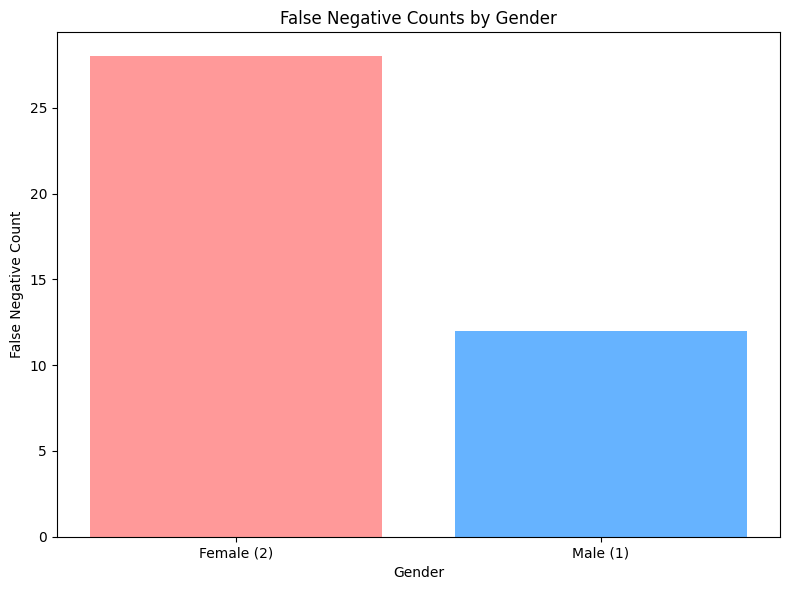

In [1]:
import matplotlib.pyplot as plt

# Data for false negative counts by gender
gender_labels = ['Female (2)', 'Male (1)']
false_negatives = [28, 12]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(gender_labels, false_negatives, color=['#ff9999', '#66b3ff'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('False Negative Count')
plt.title('False Negative Counts by Gender')

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/0z/cygn4dw93l56kxspn2s7z6b40000gn/T/ipykernel_18719/355140757.py:64: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left')


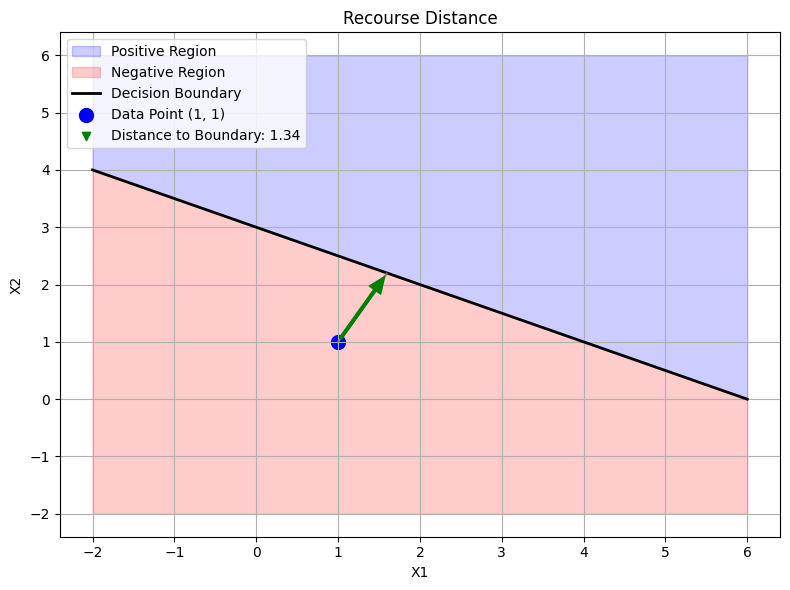

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a diagonal decision boundary (e.g., y = -0.5 * x + 3)
def decision_boundary(x):
    return -0.5 * x + 3

# Generate some points
x_vals = np.linspace(-2, 6, 100)
y_vals = decision_boundary(x_vals)

# New sample data point in the lower left region
data_point = np.array([1, 1])  # New data point (1, 1)
boundary_slope = -0.5  # Slope of the decision boundary

# Calculate the slope of the perpendicular line (negative reciprocal of boundary slope)
perpendicular_slope = -1 / boundary_slope

# Equation of the line for the boundary: y = -0.5 * x + 3
# Equation of the line for the perpendicular: y = perpendicular_slope * (x - data_point[0]) + data_point[1]
# We need to find the intersection point (closest point on the boundary)

# Intersection of the perpendicular line and the decision boundary
# Solve for x_perpendicular: (y - 3) / -0.5 = x
# Equation system:
# y_boundary = boundary_slope * x + intercept
# y_perpendicular = perpendicular_slope * (x - data_point[0]) + data_point[1]

x_perpendicular = (data_point[1] - decision_boundary(0) - perpendicular_slope * data_point[0]) / (boundary_slope - perpendicular_slope)
y_perpendicular = decision_boundary(x_perpendicular)

# Calculate distance between the data point and the decision boundary
distance = np.linalg.norm(data_point - np.array([x_perpendicular, y_perpendicular]))

# Plot decision boundary and the new data point
plt.figure(figsize=(8, 6))

# Fill regions above and below the decision boundary
plt.fill_between(x_vals, y_vals, 6, where=(y_vals < 6), color='blue', alpha=0.2, label='Positive Region')
plt.fill_between(x_vals, y_vals, -2, where=(y_vals > -2), color='red', alpha=0.2, label='Negative Region')

# Plot decision boundary
plt.plot(x_vals, y_vals, label='Decision Boundary', color='black', linewidth=2)

# Plot new sample data point in blue
plt.scatter(data_point[0], data_point[1], color='blue', label=f'Data Point (1, 1)', s=100)

# Plot the line showing the perpendicular distance from the data point to the boundary
plt.plot([data_point[0], x_perpendicular], [data_point[1], y_perpendicular], linestyle='--', color='gray')

# Add a perpendicular arrow to the boundary
plt.annotate('', xy=(x_perpendicular, y_perpendicular), xytext=(data_point[0], data_point[1]),
             arrowprops=dict(facecolor='green', edgecolor='green', shrink=0.05, width=2, headwidth=10), 
             label='Distance to Boundary')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Recourse Distance')

# Add custom legend for arrow
plt.scatter([], [], color='green', label=f'Distance to Boundary: {distance:.2f}', marker='v')

plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

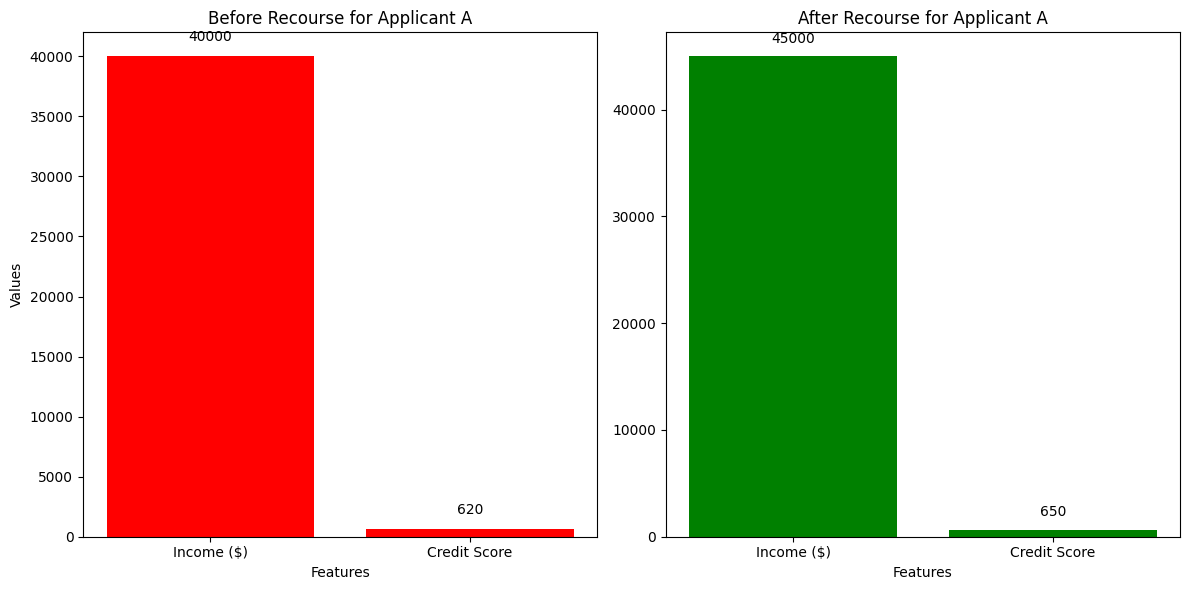

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data before recourse (Applicant A initially denied)
before_recourse = {'Income': 40000, 'Credit Score': 620}

# Data after recourse (suggested changes for approval)
after_recourse = {'Income': 45000, 'Credit Score': 650}

# X-axis labels
categories = ['Income ($)', 'Credit Score']

# Values before and after recourse
before_values = [before_recourse['Income'], before_recourse['Credit Score']]
after_values = [after_recourse['Income'], after_recourse['Credit Score']]

# X positions
x_pos = np.arange(len(categories))

# Creating two subplots: one for "Before Recourse" and one for "After Recourse"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting "Before Recourse"
ax1.bar(x_pos, before_values, color='red')
ax1.set_xlabel('Features')
ax1.set_ylabel('Values')
ax1.set_title('Before Recourse for Applicant A')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories)

# Annotating the bars for before recourse
for i, value in enumerate(before_values):
    ax1.text(i, value + 1000, f'{value}', ha='center', va='bottom')

# Plotting "After Recourse"
ax2.bar(x_pos, after_values, color='green')
ax2.set_xlabel('Features')
ax2.set_title('After Recourse for Applicant A')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(categories)

# Annotating the bars for after recourse
for i, value in enumerate(after_values):
    ax2.text(i, value + 1000, f'{value}', ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()
plt.show()

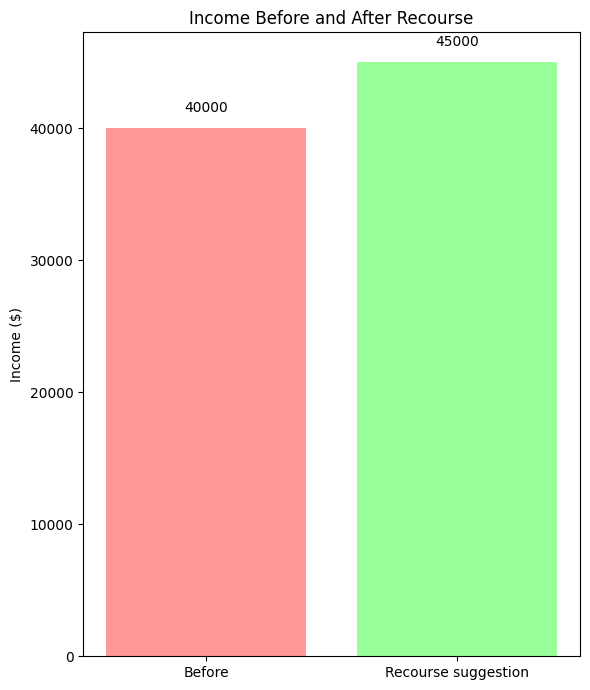

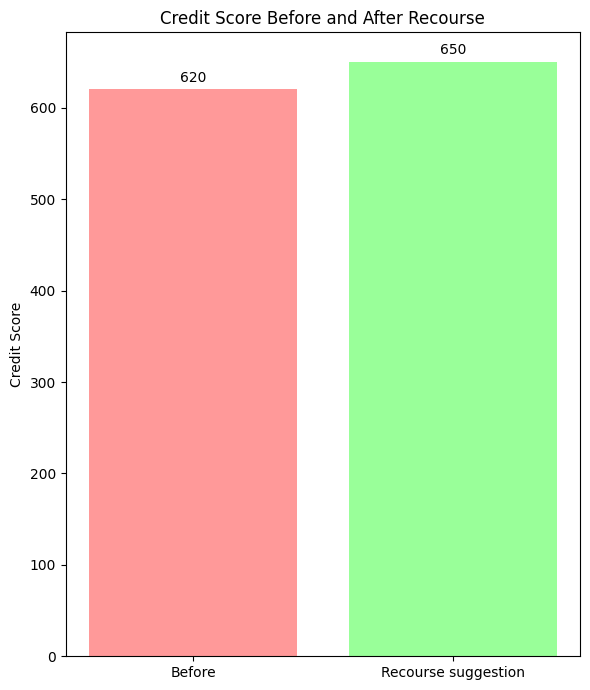

In [25]:
import matplotlib.pyplot as plt

# Data for Applicant A
before_income = 40000
after_income = 45000
before_score = 620
after_score = 650

# Define colors with shades of red and green
before_color = '#ff9999'  # Light red for 'Before'
after_color = '#99ff99'   # Light green for 'After'

# Create the first bar chart for Income
fig, ax = plt.subplots(figsize=(6, 7))

ax.bar(['Before', 'Recourse suggestion'], [before_income, after_income], color=[before_color, after_color])
ax.set_title('Income Before and After Recourse')
ax.set_ylabel('Income ($)')

# Annotate the bars
ax.text(0, before_income + 1000, f'{before_income}', ha='center', va='bottom')
ax.text(1, after_income + 1000, f'{after_income}', ha='center', va='bottom')

# Show the first chart (for Income)
plt.tight_layout()
plt.show()

# Create the second bar chart for Credit Score
fig, ax = plt.subplots(figsize=(6, 7))

ax.bar(['Before', 'Recourse suggestion'], [before_score, after_score], color=[before_color, after_color])
ax.set_title('Credit Score Before and After Recourse')
ax.set_ylabel('Credit Score')

# Annotate the bars
ax.text(0, before_score + 5, f'{before_score}', ha='center', va='bottom')
ax.text(1, after_score + 5, f'{after_score}', ha='center', va='bottom')

# Show the second chart (for Credit Score)
plt.tight_layout()
plt.show()

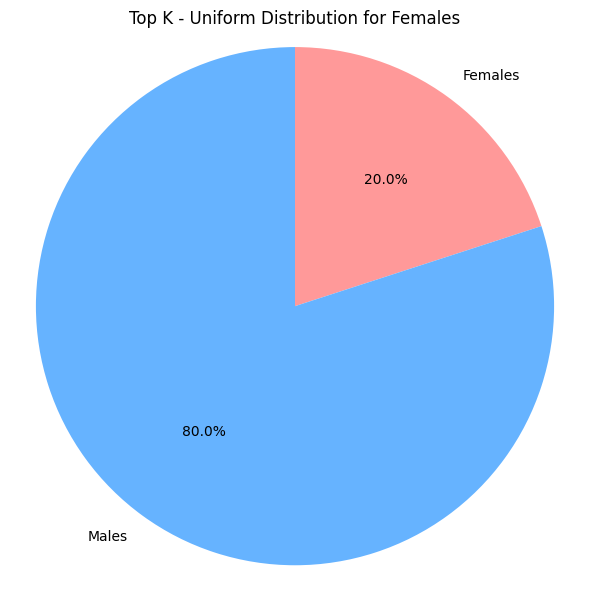

In [5]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Females', 'Males']
sizes = [20, 80]  # 20% females, 80% males
colors = ['#ff9999','#66b3ff']

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Top K - Uniform Distribution for Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

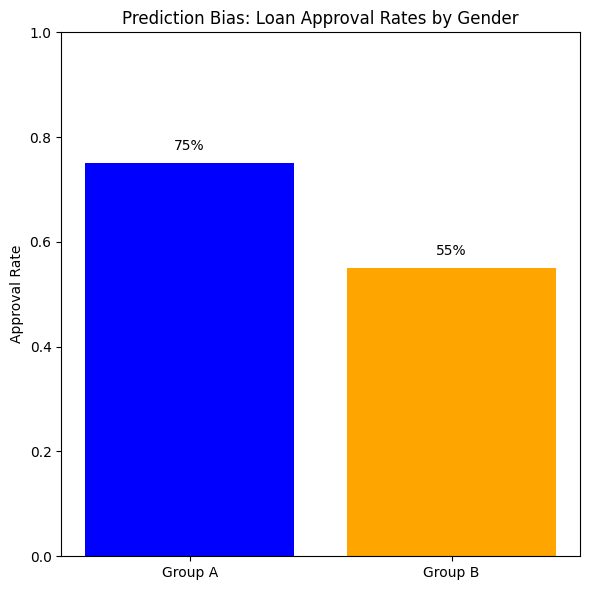

In [27]:
import matplotlib.pyplot as plt

# Prediction Bias: Bar chart to show unequal outcomes across groups
# Example data: Loan approval rates for males and females
groups = ['Group A', 'Group B']
approval_rates = [0.75, 0.55]  # 75% approval for males, 55% for females

# Bar chart for Prediction Bias
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(groups, approval_rates, color=['blue', 'orange'])
ax.set_title('Prediction Bias: Loan Approval Rates by Gender')
ax.set_ylabel('Approval Rate')
ax.set_ylim(0, 1)

# Annotate bars
for i, rate in enumerate(approval_rates):
    ax.text(i, rate + 0.02, f'{rate * 100:.0f}%', ha='center', va='bottom')

# Show the chart for Prediction Bias
plt.tight_layout()
plt.show()

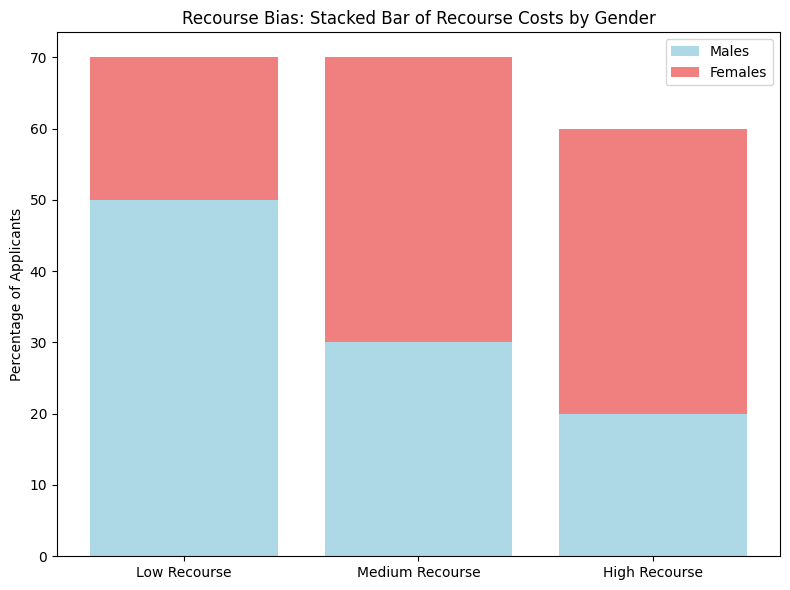

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for recourse cost categories (low, medium, high)
categories = ['Low Recourse', 'Medium Recourse', 'High Recourse']
males = [50, 30, 20]  # 50% low, 30% medium, 20% high recourse costs for males
females = [20, 40, 40]  # 20% low, 40% medium, 40% high recourse costs for females

# Stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(categories, males, label='Males', color='lightblue')
ax.bar(categories, females, bottom=males, label='Females', color='lightcoral')

# Add title and labels
ax.set_title('Recourse Bias: Stacked Bar of Recourse Costs by Gender')
ax.set_ylabel('Percentage of Applicants')
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()

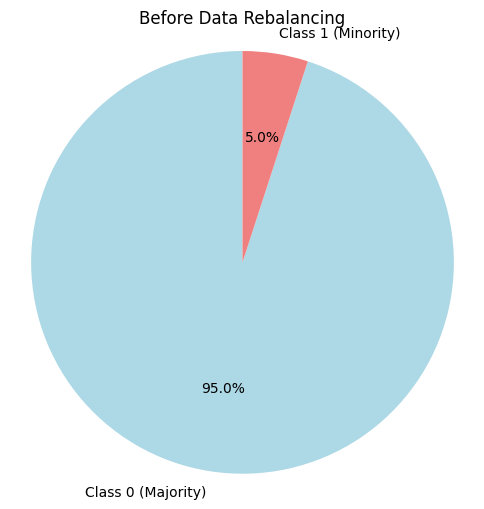

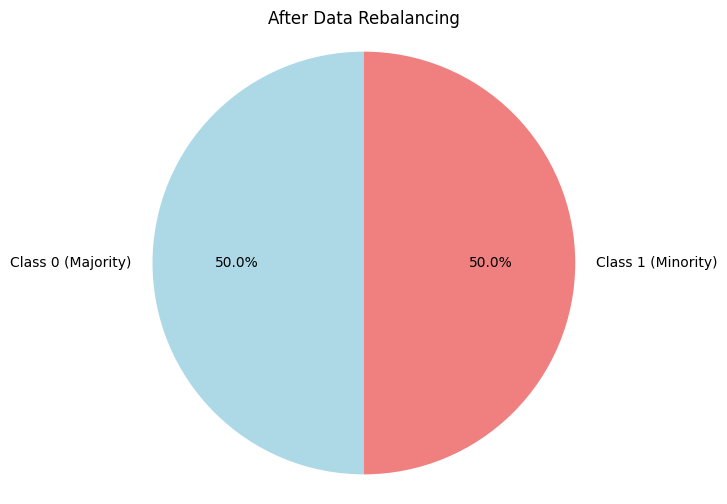

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create a pie chart for data rebalancing
def plot_pie_chart(data, labels, title):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Generate synthetic imbalanced data for pie chart
def generate_imbalanced_data():
    n_samples = [950, 50]  # Imbalanced class sizes
    labels = ['Class 0 (Majority)', 'Class 1 (Minority)']
    plot_pie_chart(n_samples, labels, 'Before Data Rebalancing')
    
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    # Adjust the number of informative features to avoid the error
    X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=0, n_clusters_per_class=1, weights=[0.95, 0.05], random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    class_counts = np.bincount(y_res)
    plot_pie_chart(class_counts, labels, 'After Data Rebalancing')

generate_imbalanced_data()

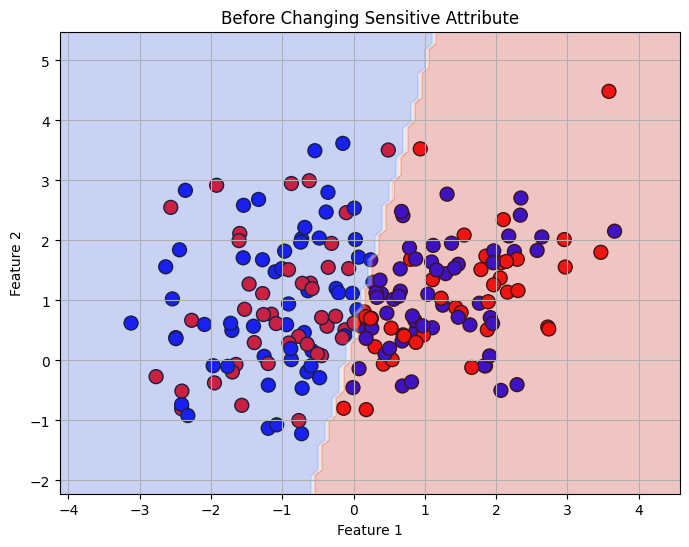

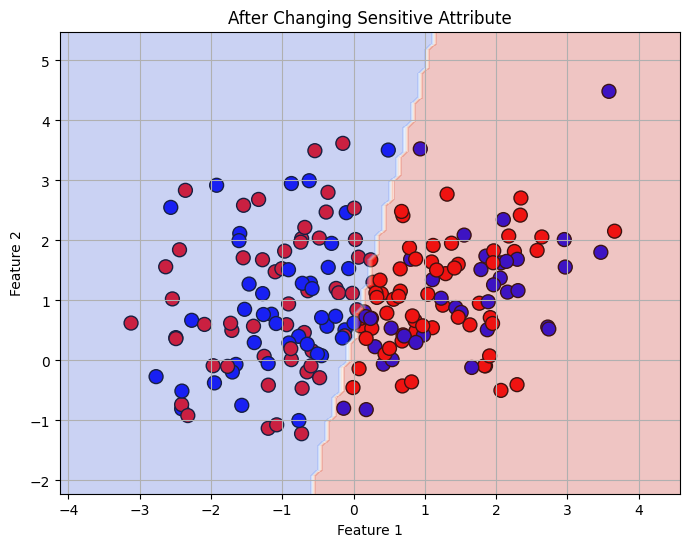

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
def generate_data():
    X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)
    sensitive_attr = np.random.choice([0, 1], size=len(y), p=[0.6, 0.4])  # Sensitive attribute, e.g., Gender
    return X, y, sensitive_attr

# Plot decision boundary and data points
def plot_scatter(X, y, sensitive_attr, model, title):
    plt.figure(figsize=(8, 6))

    # Scatter plot for data points
    plt.scatter(X[:, 0], X[:, 1], c=sensitive_attr, cmap='bwr', s=100, edgecolor='k', label='Original')
    
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict class probabilities for each point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    # plt.colorbar(label='Sensitive Attribute (e.g., Gender)')
    plt.show()

# Apply counterfactual fairness by switching the sensitive attribute and visualizing its effect
def counterfactual_fairness(X, y, sensitive_attr):
    # Train a logistic regression model to show decision boundary
    model = LogisticRegression()
    model.fit(X, y)

    # Plot before changing the sensitive attribute
    plot_scatter(X, y, sensitive_attr, model, 'Before Changing Sensitive Attribute')

    # Now switch the sensitive attribute (counterfactual fairness scenario)
    sensitive_attr_after = np.where(sensitive_attr == 0, 1, 0)

    # Plot after changing the sensitive attribute
    plot_scatter(X, y, sensitive_attr_after, model, 'After Changing Sensitive Attribute')

# Generate data and plot before and after
X, y, sensitive_attr = generate_data()
counterfactual_fairness(X, y, sensitive_attr)

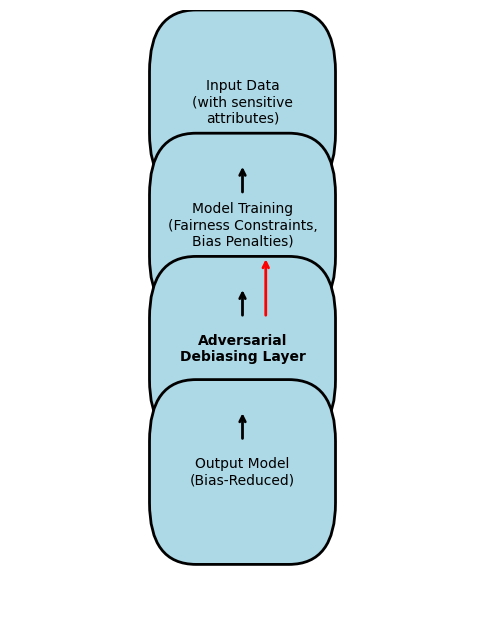

In [70]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def create_vertical_flowchart():
    fig, ax = plt.subplots(figsize=(6, 8))

    # Add the flowchart boxes with labels
    box_style = {"boxstyle": "round,pad=0.1", "fc": "lightblue", "ec": "black", "lw": 2}
    arrow_style = {"arrowstyle": "->", "lw": 2}  # Normal arrow style

    # Input Data (starting from the top)
    input_box = FancyBboxPatch((0.4, 0.8), 0.2, 0.1, **box_style)
    ax.add_patch(input_box)
    ax.text(0.5, 0.85, "Input Data\n(with sensitive\nattributes)", fontsize=10, ha="center", va="center")

    # Model Training
    training_box = FancyBboxPatch((0.4, 0.6), 0.2, 0.1, **box_style)
    ax.add_patch(training_box)
    ax.text(0.5, 0.65, "Model Training\n(Fairness Constraints,\nBias Penalties)", fontsize=10, ha="center", va="center")

    # Adversarial Debiasing (highlighted)
    adversarial_box = FancyBboxPatch((0.4, 0.4), 0.2, 0.1, **box_style)
    ax.add_patch(adversarial_box)
    ax.text(0.5, 0.45, "Adversarial\nDebiasing Layer", fontsize=10, ha="center", va="center", fontweight='bold')

    # Output Model
    output_box = FancyBboxPatch((0.4, 0.2), 0.2, 0.1, **box_style)
    ax.add_patch(output_box)
    ax.text(0.5, 0.25, "Output Model\n(Bias-Reduced)", fontsize=10, ha="center", va="center")

    # Arrows between boxes
    ax.annotate("", xy=(0.5, 0.75), xytext=(0.5, 0.7), arrowprops=arrow_style)
    ax.annotate("", xy=(0.5, 0.55), xytext=(0.5, 0.5), arrowprops=arrow_style)
    ax.annotate("", xy=(0.5, 0.35), xytext=(0.5, 0.3), arrowprops=arrow_style)

    # Feedback arrow from Adversarial Debiasing to Model Training
    ax.annotate("", xy=(0.55, 0.5), xytext=(0.55, 0.6), arrowprops={"arrowstyle": "<-", "color": "red", "lw": 2})

    # Hide axes
    ax.set_axis_off()

    plt.show()

create_vertical_flowchart()

In [72]:
import plotly.graph_objects as go

def create_flowchart_plotly():
    fig = go.Figure()

    # Define the nodes (boxes)
    nodes = [
        "Input Data\n(with sensitive attributes)",  # Node 0
        "Model Training\n(Fairness Constraints,\nBias Penalties)",  # Node 1
        "Adversarial Debiasing Layer",  # Node 2
        "Output Model\n(Bias-Reduced)"  # Node 3
    ]

    # Define the positions for each node (y coordinates)
    y_coords = [1, 0.75, 0.5, 0.25]

    # Add nodes (rectangles) to the figure
    for i, node in enumerate(nodes):
        fig.add_trace(go.Scatter(
            x=[0.5],
            y=[y_coords[i]],
            text=node,
            mode="text",
            textfont=dict(size=16),
            showlegend=False
        ))
        fig.add_shape(
            type="rect",
            x0=0.4, y0=y_coords[i] - 0.05, x1=0.6, y1=y_coords[i] + 0.05,
            line=dict(color="blue"),
            fillcolor="lightblue"
        )

    # Add arrows between the nodes
    arrow_props = dict(showarrow=True, arrowhead=2, arrowsize=2, arrowwidth=2)
    fig.add_annotation(x=0.5, y=0.75, xref="x", yref="y", ax=0.5, ay=1, **arrow_props)
    fig.add_annotation(x=0.5, y=0.5, xref="x", yref="y", ax=0.5, ay=0.75, **arrow_props)
    fig.add_annotation(x=0.5, y=0.25, xref="x", yref="y", ax=0.5, ay=0.5, **arrow_props)

    # Feedback arrow from Adversarial Debiasing to Model Training
    fig.add_annotation(
        x=0.5, y=0.75, xref="x", yref="y", ax=0.5, ay=0.5,
        arrowhead=2, arrowsize=2, arrowwidth=2, arrowcolor="red", showarrow=True
    )

    # Set axis properties
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)

    # Update layout
    fig.update_layout(
        title="Adversarial Debiasing Flowchart",
        height=600,
        width=400,
        showlegend=False
    )

    fig.show()

create_flowchart_plotly()